In [5]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import widgets
import glob

from connectivity import constants as const
from connectivity import visualize as vis
from connectivity import nib_utils as nio

%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# initialize directories
dirs = const.Dirs()

No handles with labels found to put in legend.


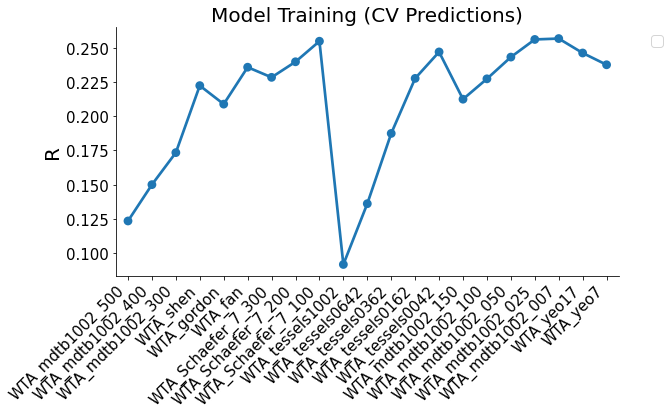

<Figure size 432x288 with 0 Axes>

In [67]:
# plot alpha curve for train CVs
# WTA

df = vis.train_summary()

vis.plot_train_predictions(df, 
                           x='train_name', 
                           methods=['WTA'], 
                           best_models=False); 


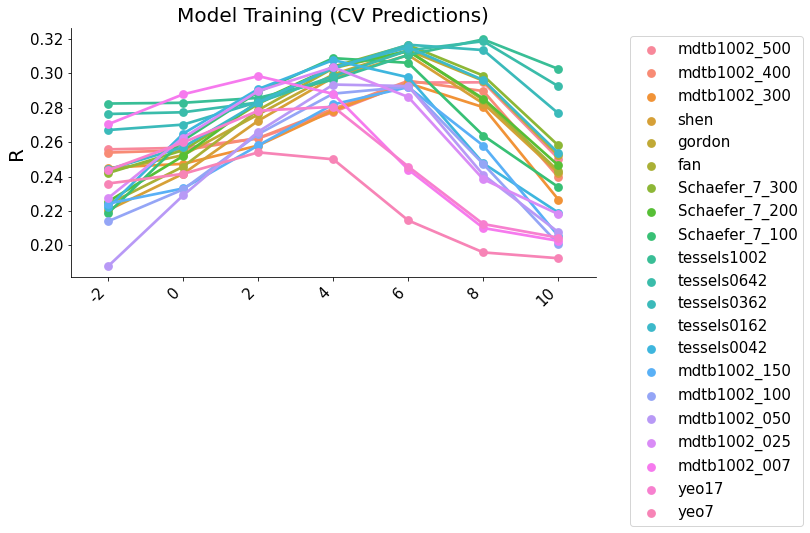

<Figure size 432x288 with 0 Axes>

In [60]:
# RIDGE

df = vis.train_summary()

vis.plot_train_predictions(dataframe=df, 
                           x='train_hyperparameter', 
                           hue='train_X_data', 
                           methods=['L2regression'], 
                           best_models=False);


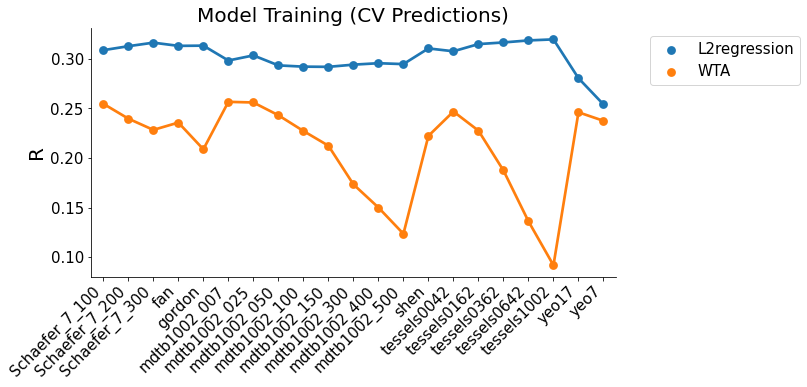

<Figure size 432x288 with 0 Axes>

In [58]:
# compare methods (cv)

df = vis.train_summary()

vis.plot_train_predictions(dataframe=df, x='train_X_data', hue='train_model', best_models=True)


In [69]:
# Model evaluation (noise ceiling and predictions) - best model

# get evaluation 
df_eval = vis.eval_summary()

#plot evaluation
vis.plot_best_eval(dataframe=df_eval)

FileNotFoundError: [Errno 2] File b'/Users/maedbhking/Documents/cerebellum_connectivity/data/sc1/conn_models/eval/eval_summary.csv' does not exist: b'/Users/maedbhking/Documents/cerebellum_connectivity/data/sc1/conn_models/eval/eval_summary.csv'

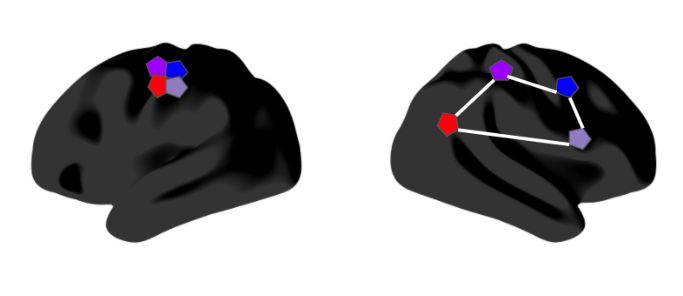

In [8]:
import matplotlib.image as mpimg

fname = os.path.join(dirs.figure, 'sparsity.png')

fig = plt.figure(figsize=(12,12))
img = mpimg.imread(fname)
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
@widgets.interact(roi=['yeo7', 'yeo17', 'mdtb1002_007'])

def distance_matrix(roi):
    vis.show_distance_matrix(roi)

interactive(children=(Dropdown(description='roi', options=('yeo7', 'yeo17', 'mdtb1002_007'), value='yeo7'), Ou…

interactive(children=(Dropdown(description='structure', options=('cerebellum', 'cortex'), value='cerebellum'),…

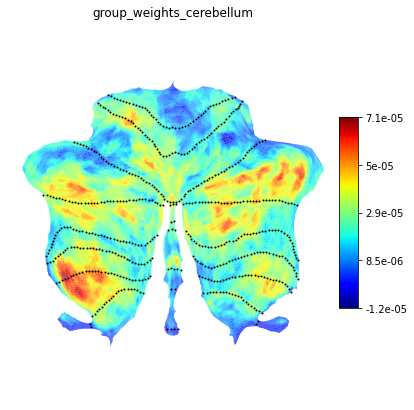

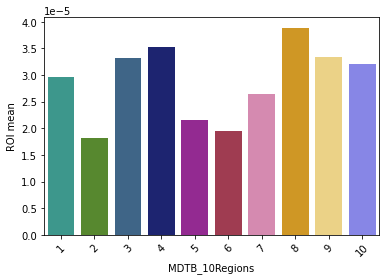

In [82]:
# visualize model weights - cerebellum or cortex

exp = 'sc1'

model, _ = vis.get_best_models(train_exp=exp)
model.insert(0,'best_model')

# get atlases
_, atlases = nio.get_cerebellar_atlases()

@widgets.interact(structure=['cerebellum', 'cortex'],
                 model_name=model,
                 hemisphere=[None, 'R', 'L'], 
                 colorbar=[True, False],
                 roi_summary=[True, False],
                 atlas=atlases)

def map_weights(structure, model_name, hemisphere, colorbar, roi_summary, atlas):
    view = vis.map_weights(structure, exp, model_name, hemisphere, rois=roi_summary, atlas=atlas)

interactive(children=(Dropdown(description='data', options=('R', 'R2', 'noiseceiling_XY_R', 'noiseceiling_Y_R'…

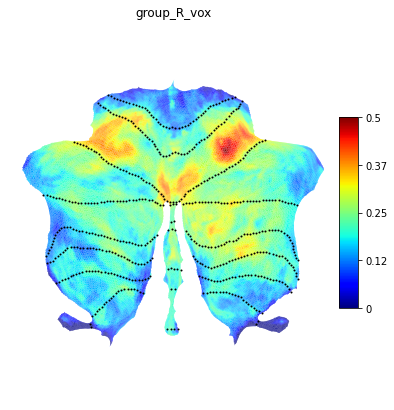

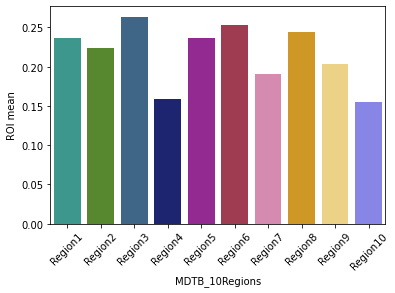

In [96]:
# visualize model evaluations

exp = 'sc1'

model, _ = vis.get_eval_models(exp=exp)
model.insert(0,'best_model')

# get atlases
_, atlases = nio.get_cerebellar_atlases()

@widgets.interact(data=['R','R2',
                        'noiseceiling_XY_R',
                        'noiseceiling_Y_R'],
                 model_name=model,
                 colorbar=[True, False],
                 roi_summary=[True, False],
                 atlas=atlases)

def map_eval(data, model_name, colorbar, roi_summary, atlas):
    view = vis.map_eval(data, exp, model_name, colorbar, rois=roi_summary, atlas=atlas)

interactive(children=(Dropdown(description='model_name', options=('Schaefer_7_100', 'Schaefer_7_200', 'Schaefe…

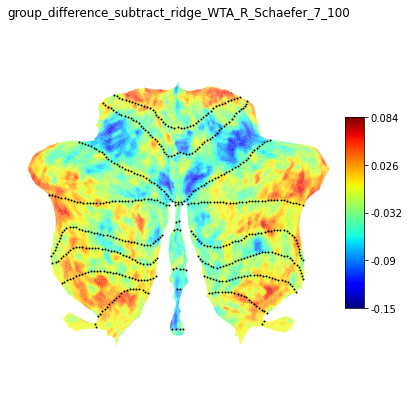

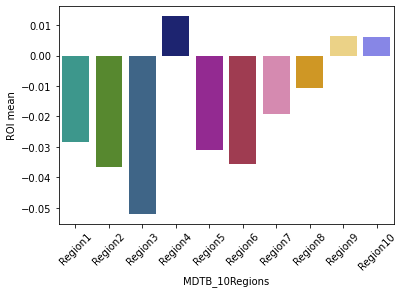

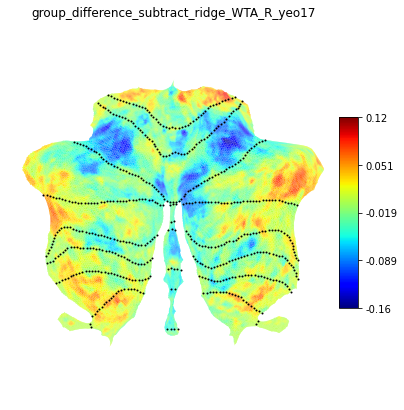

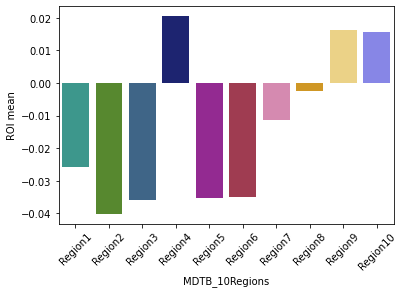

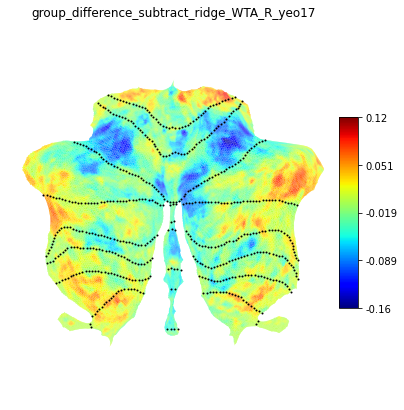

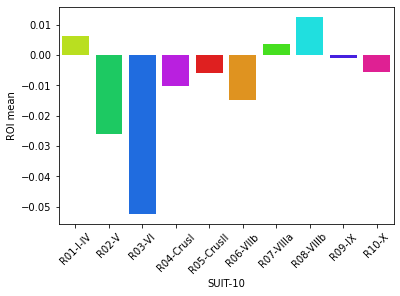

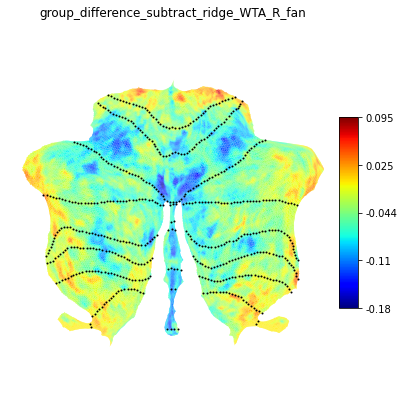

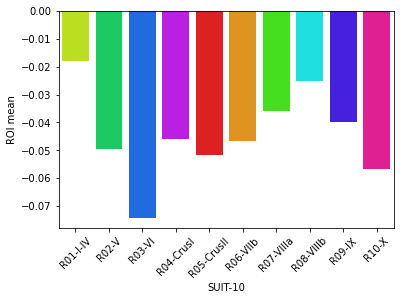

In [10]:
# visualize model comparisons (binary or subtract)

exp = 'sc1'

# get evaluated models
_, cortex_names = vis.get_eval_models(exp=exp)

# get atlases
_, atlases = nio.get_cerebellar_atlases()

@widgets.interact(model_name=cortex_names, 
                 method=['subtract', 'binarize'],
                 colorbar=[True, False],
                 roi_summary=[True, False],
                 atlas=atlases)

def plot_difference(model_name, method, colorbar, roi_summary, atlas):
    view = vis.map_model_comparison(model_name, exp, method, colorbar, rois=roi_summary, atlas=atlas)
    

interactive(children=(Dropdown(description='parcellation', options=('/Users/maedbhking/Documents/cerebellum_co…

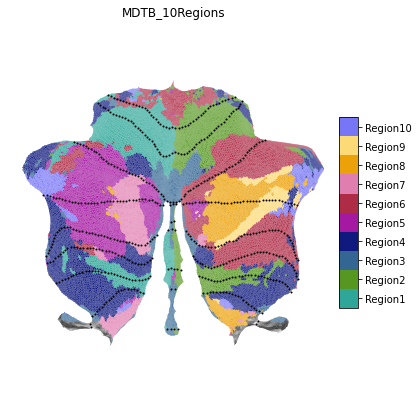

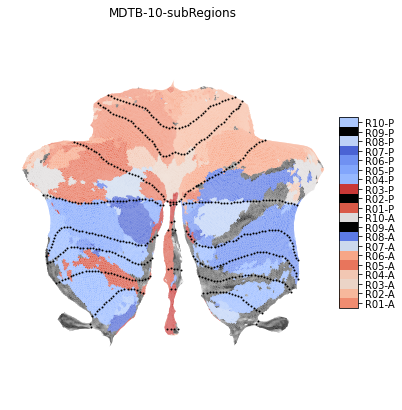

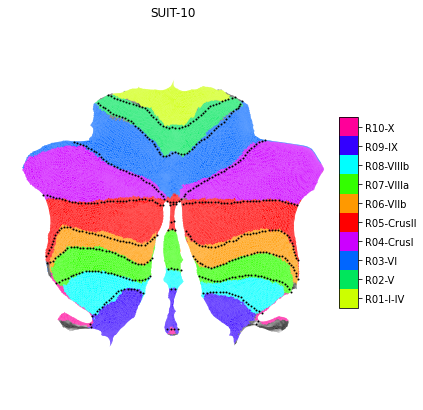

In [89]:
# plot parcellation - cerebellum
fpaths, cortex_names =nio.get_cerebellar_atlases()
@widgets.interact(parcellation=fpaths)

def plot_parcellation(parcellation):
    view = vis.map_atlas(parcellation, structure='cerebellum')

In [ ]:
# plot parcellation - cortex

@widgets.interact(parcellation=nio.get_cortical_atlases())

def plot_parcellation(parcellation):
    view = vis.map_atlas(parcellation, structure='cortex')